# Overview
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data Overview

The data has been split into two groups:

> training set (train.csv) <br>
> test set (test.csv) <br>

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Dictionary

data and its note are listed below:

<center>
<table>
    <th>Variable</th>	
    <th>Definition</th>	
    <th>Key</th>
    <tr>
        <td>survival</td>	
        <td>Survival</td>	
        <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
        <td>pclass	</td>
        <td>Ticket class </td>	
        <td>1 = 1st, 2 = 2nd, 3 = 3rd </td>
    </tr>
    <tr>
        <td>sex	</td>
        <td>Sex	</td>
        <td> </td>
    </tr>
    <tr>
        <td>Age	</td>
        <td>Age in years</td>
        <td> </td>
    </tr>
    <tr>
        <td>sibsp	</td>
        <td># of siblings / spouses aboard the Titanic	</td>
        <td> </td>
    </tr>
    <tr>
        <td>parch	</td>
        <td># of parents / children aboard the Titanic	</td>
        <td> </td>
    </tr>
    <tr>
        <td>ticket	</td>
        <td>Ticket number	</td>
        <td> </td>
    </tr>
    <tr>
        <td>fare	</td>
        <td>Passenger fare	</td>
        <td> </td>
    </tr>
    <tr>
        <td>cabin	</td>
        <td>Cabin number  </td>
        <td> </td>
    </tr>
    <tr>
        <td>embarked	</td>
        <td>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton </td>
        <td> </td>
    </tr>
</table>
</center>

# Model Construction
## Input Data

In [2]:
import os.path

print(os.path.abspath(" "))

/Users/collinsliu/jupyter/machine_learning/cases/ 


In [5]:
import numpy as np
import pandas as pd

data_name = "train.csv"
titanic_data = pd.read_csv("./titanic/"+data_name)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing
1. transforming raw data into metrics that could be used for machine learning
2. split raw data into train set and test set, and don't touch test set until model is chosen and fine-tuned

### Analysis of data
1. first, we notice that <font color=burgendy><b>Cabin</b></font> column has many missing value. As we could simply infer, location while ship wreck toke place could greatly affect survival rate of passenger. Yet with lost data of Inner structure of Titanic and the missing of data, we decide to use other two colums of data, which are <font color=burgendy><b>Fare</b></font> and <font color=burgendy><b>Embarked</b></font>. To common sense, longer trip and higher class of cabin would be more expensive, thus we could combine those two columns to just one index, renaming it as pas_class, implying the possible class of passengers. To our anticipation, higher class passengers would have more chance to survive.

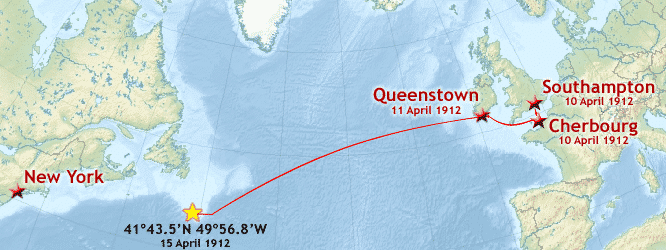

 as we can see in the picture showing routine of Titanic above, the Fare in order from lower to higher should be
 $$
 C >S > Q
 $$

2. In our consideration, <font color=burgendy><b>Passenger name</b></font> as well as <font color=burgendy><b>Ticket number</b></font> are two index of less importance, our take is to delete them for good. Although surnames could give us considerable hints of its masters' social status, as well as the ticket number would do, for the sake of simplicity, diving into those data too deep serves no good for solving this problem.

3. For the rest of index, we choose to take them all, with some transformation such as turning non-numeric data into number and implement some standardization for data integration purpose.